# 자동으로 특정위치에 값을 입력하기
---
## Content
    1. Setting the options
      1.1 디렉토리 생성
    2. Load the Data
      2.1 자동화 대상 리스트 불러오기
      2.2 일정형식을 가진 파일 불러오기
    3. Enter the values automatically
      3.1 특정 위치 입력 과정
      3.2 자동화 
---

In [3]:
import os
import pandas as pd
import numpy as np
import openpyxl as oxl
from IPython.display import Image

## 1. Setting the options   

 일정형식의 파일에 특정 값들을 특정 위치에 자동으로 넣는 과정을 진행합니다. 이번 작업을 위해서는 **자동화 대상 리스트**와 **일정형식을 가진 파일**이 필요합니다. 여기서는 각각의 엑셀파일로 존재하는 상황에서 과정을 진행합니다.

### 1.1 디렉토리 생성

- **HOMEDIR**를 생성하면 자동으로 하위 폴더가 지정되도록 설정하였습니다.  
- HOMEDIR/dat : 사용할 파일 위치
- HOMEDIR/out : 생성한 파일 위치

In [8]:
HOMEDIR = 'G:/내 드라이브/03_Project/autoFraudit/'
datDir = os.path.join(HOMEDIR, 'dat')
outDir = os.path.join(HOMEDIR, 'out')

## 2. Load the Data

### 2.1 자동화 대상 리스트 불러오기

In [9]:
tableDF = pd.read_excel(datDir + '/list.xlsx', header = 0)
tableDF

,순번,피감사업체명
0,1,(주)서플러스글로벌
1,2,코오롱오토모티브㈜
2,3,아토메탈테크코리아㈜
3,4,(주)다원넥스트
4,5,덕평랜드㈜
5,6,네이처브리지㈜
6,7,포항새물길㈜
7,8,(주)서울승합
8,9,썬에이스해운㈜
9,10,(주)토펙엔지니어링


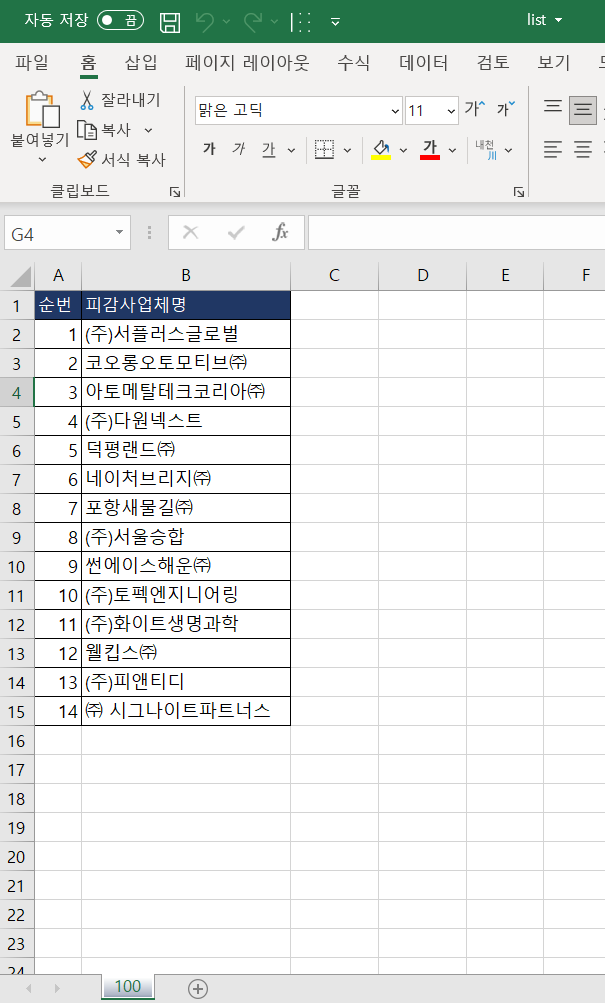

In [37]:
Image("list.PNG", width = 500)

### 2.2 일정형식을 가진 파일 불러오기   
엑셀의 형식을 읽어오려면 모듈 **openpyxl**의 메소드**load_workbook**으로 로드하면 됩니다. 현재 과정에서는 아래 사진과 같은 파일을 불러왔습니다.


In [11]:
xlsxObject = oxl.load_workbook(datDir + '/title_format.xlsx')
xlsxObject 

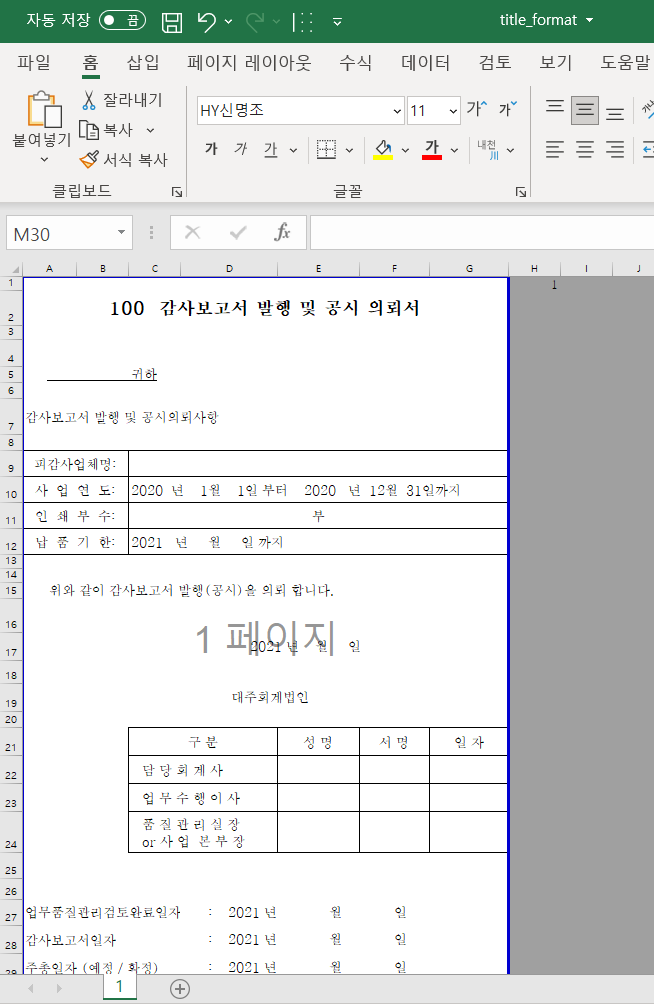

In [42]:
Image("title_format.PNG", width = 500)

### 3.1 특정 위치 입력 과정

In [15]:
type(xlsxObject)

openpyxl.workbook.workbook.Workbook

In [16]:
# 엑셀 파일의 워크시트명
sheetNameL = xlsxObject.sheetnames
sheetNameL

['1']

In [17]:
SHEET_NAME = '1'

In [18]:
# 워크시트 읽기
sheet1 = xlsxObject[SHEET_NAME]

In [24]:
ii = 0
sheet1['C9'].value = tableDF.loc[0, '피감사업체명']

name = tableDF.loc[0, '피감사업체명']
xlsxObject.save(outDir + f'/{ii}_{name}.xlsx')

### 3.2 자동화

In [31]:
# 위 방식으로 자동화
for ii in range(tableDF.shape[0]):
    xlsxObject = oxl.load_workbook(datDir + '/title_format.xlsx')
    xlsxObject     
    sheet1 = xlsxObject['1']
    sheet1['C9'].value = tableDF.loc[ii, '피감사업체명']
    name = tableDF.loc[ii, '피감사업체명']
    print(name)
    xlsxObject.save(outDir + f'/{ii}_{name}.xlsx')


(주)서플러스글로벌
코오롱오토모티브㈜
아토메탈테크코리아㈜
(주)다원넥스트
덕평랜드㈜
네이처브리지㈜
포항새물길㈜
(주)서울승합
썬에이스해운㈜
(주)토펙엔지니어링
(주)화이트생명과학
웰킵스㈜
(주)피앤티디
㈜ 시그나이트파트너스
